In [1]:
print("Back Propogation Feed Forward Neural Network")

Back Propogation Feed Forward Neural Network


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
num_samples = 300
num_classes = 3 
num_features = 2 

X = np.zeros((num_samples, num_features))
Y = np.zeros((num_samples, num_classes))

In [6]:
for i in range(num_classes):
    idx = range(i * (num_samples // num_classes), (i + 1) * (num_samples // num_classes))
    X[idx] = np.random.randn(len(idx), num_features) + np.array([i * 3, i * 3])
    Y[idx, i] = 1 

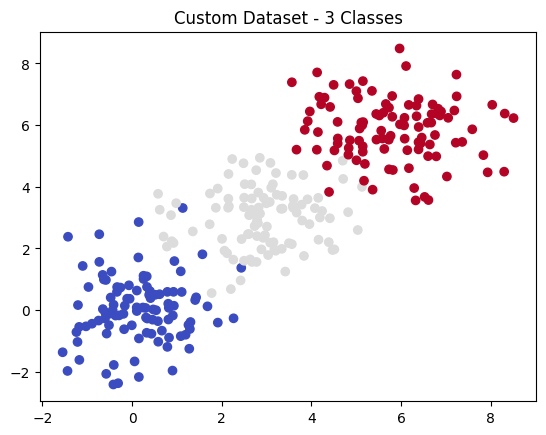

In [7]:
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), cmap='coolwarm')
plt.title("Custom Dataset - 3 Classes")
plt.show()

In [10]:
# Neural Network Architecture
input_size = 2
hidden_size1 = 10
hidden_size2 = 8
output_size = 3

# Initialize Weights and Biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * 0.01
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, hidden_size2) * 0.02
b2 = np.zeros((1, hidden_size2))
W3 = np.random.randn(hidden_size2, output_size) * 0.03
b3 = np.zeros((1, output_size))

In [11]:
# Activation Function: ReLU
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

# Softmax Activation for Output Layer
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Stability trick
    return expZ / np.sum(expZ, axis=1, keepdims=True)

In [12]:
# Forward Propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)

    cache = (X, Z1, A1, Z2, A2, Z3, A3)
    return A3, cache

In [13]:
# Compute Loss (Categorical Cross-Entropy)
def compute_loss(Y_hat, Y):
    m = Y.shape[0]
    return -np.sum(Y * np.log(Y_hat + 1e-8)) / m

In [14]:
# Backpropagation
def backward_propagation(Y_hat, Y, cache):
    X, Z1, A1, Z2, A2, Z3, A3 = cache
    m = Y.shape[0]

    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dZ2 = np.dot(dZ3, W3.T) * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return gradients


In [15]:
# Update Parameters using Gradient Descent
def update_parameters(gradients, learning_rate=0.016):
    global W1, b1, W2, b2, W3, b3
    W1 -= learning_rate * gradients["dW1"]
    b1 -= learning_rate * gradients["db1"]
    W2 -= learning_rate * gradients["dW2"]
    b2 -= learning_rate * gradients["db2"]
    W3 -= learning_rate * gradients["dW3"]
    b3 -= learning_rate * gradients["db3"]


In [16]:
# Compute Accuracy
def compute_accuracy(Y_hat, Y):
    predictions = np.argmax(Y_hat, axis=1)
    labels = np.argmax(Y, axis=1)
    return np.mean(predictions == labels)

In [17]:
# Training Loop
epochs = 1000
learning_rate = 0.01

for epoch in range(epochs):
    # Forward Pass
    Y_hat, cache = forward_propagation(X)
    
    # Compute Loss
    loss = compute_loss(Y_hat, Y)
    
    # Backward Pass
    gradients = backward_propagation(Y_hat, Y, cache)
    
    # Update Parameters
    update_parameters(gradients, learning_rate)
    
    if epoch % 100 == 0:
        acc = compute_accuracy(Y_hat, Y)
        print(f"Epoch {epoch}: Loss={loss:.4f}, Accuracy={acc:.4f}")

Epoch 0: Loss=1.0986, Accuracy=0.5133
Epoch 100: Loss=1.0986, Accuracy=0.6167
Epoch 200: Loss=1.0986, Accuracy=0.5967
Epoch 300: Loss=1.0986, Accuracy=0.5967
Epoch 400: Loss=1.0986, Accuracy=0.5933
Epoch 500: Loss=1.0985, Accuracy=0.5900
Epoch 600: Loss=1.0985, Accuracy=0.5833
Epoch 700: Loss=1.0985, Accuracy=0.5733
Epoch 800: Loss=1.0985, Accuracy=0.5633
Epoch 900: Loss=1.0985, Accuracy=0.6433


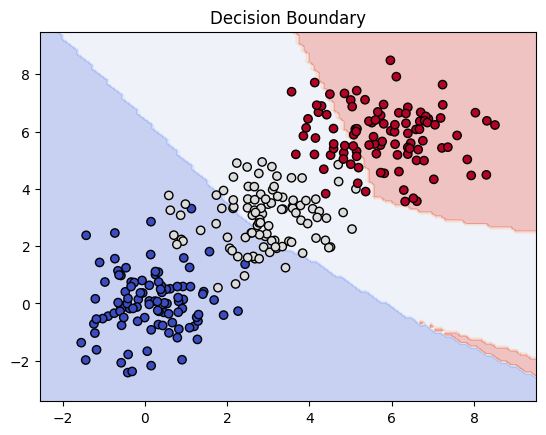

In [18]:
# Visualizing Decision Boundaries
def plot_decision_boundary(X, Y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Y_hat, _ = model(X_grid)
    Z = np.argmax(Y_hat, axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), cmap='coolwarm', edgecolor='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X, Y, forward_propagation)